<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploración-datos" data-toc-modified-id="Exploración-datos-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploración datos</a></span></li><li><span><a href="#Nivel-de-obesidad" data-toc-modified-id="Nivel-de-obesidad-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Nivel de obesidad</a></span></li><li><span><a href="#Exploración-Previa---Solo-cuantitativa" data-toc-modified-id="Exploración-Previa---Solo-cuantitativa-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploración Previa - Solo cuantitativa</a></span></li><li><span><a href="#Exploración-Total" data-toc-modified-id="Exploración-Total-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploración Total</a></span></li><li><span><a href="#Aprendizaje-Supervisado" data-toc-modified-id="Aprendizaje-Supervisado-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Aprendizaje Supervisado</a></span></li><li><span><a href="#Infome-Final" data-toc-modified-id="Infome-Final-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Infome Final</a></span></li></ul></div>

#  Nivel de obesidad

Este ejercicio guiado pretende que ustedes hagan una exploración completa a la base, identifiquen grupos en la población y desarrolen modelos que permitan determinar el nivel de obesidad para cualquier individuo.

Después de descargar, cargamos la base:

Hagan una exploración manual de la base, identifiquen las variables y los tipos de variables a las que nos enfretamos y, con su grupo, plantee unas hipótesis frente a las tareas planteadas. En lo que sigue se sugeriran algunos puntos a desarrollar en este trabajo.

## Exploración de datos

La idea en esta sección es hacer un EDA sobre la base. Es muy importante identificar datos atípicos, nulos y relaciones entre variables (colinealidad, alta correlación, etc.).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
import numpy as np
import prince

from scipy import stats
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram


from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from funciones import *
from taller_7_ap import *
import warnings
warnings.filterwarnings('ignore')

### Lectura de la base

In [2]:
url='https://raw.githubusercontent.com/MichelCespedes/MaestriaDatos/main/SegundoSemestre/MetodosEstadisticos/Taller3/ObesityDataSet_raw_and_data_sinthetic.csv'
DataO=pd.read_csv(url)

In [3]:
DataO

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

In [4]:
base(DataO)

Columnas     Tipo  Único  Nulos
0                           Gender   object      2      0
1                              Age  float64   1402      0
2                           Height  float64   1574      0
3                           Weight  float64   1525      0
4   family_history_with_overweight   object      2      0
5                             FAVC   object      2      0
6                             FCVC  float64    810      0
7                              NCP  float64    635      0
8                             CAEC   object      4      0
9                            SMOKE   object      2      0
10                            CH2O  float64   1268      0
11                             SCC   object      2      0
12                             FAF  float64   1190      0
13                             TUE  float64   1129      0
14                            CALC   object      4      0
15                          MTRANS   object      5      0
16                      NObeyesdad   object      7      0

In [5]:
cuanti = DataO.select_dtypes(np.number).columns
x = []
fig = go.Figure()
for i in cuanti:
    x.append(DataO[i])
    fig.add_trace(go.Box(y=DataO[i],name= i))

fig.show()

#### Transformar variables a categorias a dummies

In [6]:
le = preprocessing.LabelEncoder()
DataO.Gender = le.fit_transform(DataO.Gender.values)
DataO.CAEC = le.fit_transform(DataO.CAEC.values)
DataO.CALC = le.fit_transform(DataO.CALC.values)
DataO.MTRANS = le.fit_transform(DataO.MTRANS.values)
DataO.family_history_with_overweight = le.fit_transform(DataO.family_history_with_overweight.values)
DataO.FAVC = le.fit_transform(DataO.FAVC.values)
DataO.SMOKE = le.fit_transform(DataO.SMOKE.values)
DataO.SCC = le.fit_transform(DataO.SCC.values)

In [7]:
Cat_CAEC = ['Always', 'Frequently', 'Sometimes', 'no']
Cat_CALC = ['Always', 'Frequently', 'Sometimes', 'no']
Cat_MTRANS = ['Automobile' 'Bike' 'Motorbike' 'Public_Transportation' 'Walking']

#### Redondear variables

In [8]:
DataO['Age'] = pd.Series(round(val) for val in DataO['Age'])
DataO['FCVC'] = pd.Series(round(val) for val in DataO['FCVC'])
DataO['NCP'] = pd.Series(round(val) for val in DataO['NCP'])
DataO['CH2O'] = pd.Series(round(val) for val in DataO['CH2O'])
DataO['FAF'] = pd.Series(round(val) for val in DataO['FAF'])
DataO['TUE'] = pd.Series(round(val) for val in DataO['TUE'])

In [9]:
base(DataO)

Columnas     Tipo  Único  Nulos
0                           Gender    int32      2      0
1                              Age    int64     40      0
2                           Height  float64   1574      0
3                           Weight  float64   1525      0
4   family_history_with_overweight    int32      2      0
5                             FAVC    int32      2      0
6                             FCVC    int64      3      0
7                              NCP    int64      4      0
8                             CAEC    int32      4      0
9                            SMOKE    int32      2      0
10                            CH2O    int64      3      0
11                             SCC    int32      2      0
12                             FAF    int64      4      0
13                             TUE    int64      3      0
14                            CALC    int32      4      0
15                          MTRANS    int32      5      0
16                      NObeyesdad   object      7      0

In [10]:
DataO

Gender  Age    Height      Weight  family_history_with_overweight  FAVC  \
0          0   21  1.620000   64.000000                               1     0   
1          0   21  1.520000   56.000000                               1     0   
2          1   23  1.800000   77.000000                               1     0   
3          1   27  1.800000   87.000000                               0     0   
4          1   22  1.780000   89.800000                               0     0   
...      ...  ...       ...         ...                             ...   ...   
2106       0   21  1.710730  131.408528                               1     1   
2107       0   22  1.748584  133.742943                               1     1   
2108       0   23  1.752206  133.689352                               1     1   
2109       0   24  1.739450  133.346641                               1     1   
2110       0   24  1.738836  133.472641                               1     1   

      FCVC  NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  \
0        2    3     2      0     2    0    0    1     3       3   
1        3    3     2      1     3    1    3    0     2       3   
2        2    3     2      0     2    0    2    1     1       3   
3        3    3     2      0     2    0    2    0     1       4   
4        2    1     2      0     2    0    0    0     2       3   
...    ...  ...   ...    ...   ...  ...  ...  ...   ...     ...   
2106     3    3     2      0     2    0    2    1     2       3   
2107     3    3     2      0     2    0    1    1     2       3   
2108     3    3     2      0     2    0    1    1     2       3   
2109     3    3     2      0     3    0    1    1     2       3   
2110     3    3     2      0     3    0    1    1     2       3   

               NObeyesdad  
0           Normal_Weight  
1           Normal_Weight  
2           Normal_Weight  
3      Overweight_Level_I  
4     Overweight_Level_II  
...                   ...  
2106     Obesity_Type_III  
2107     Obesity_Type_III  
2108     Obesity_Type_III  
2109     Obesity_Type_III  
2110     Obesity_Type_III  

[2111 rows x 17 columns]

In [11]:
#correlacion_spearman(DataO,True,15,10)

## Nivel de obesidad

Es claro que la altura y el peso son determinantes en el Nivel de obesidad, como lo muestra el siguiente gráfico:

In [12]:
px.scatter(DataO,x='Weight',y='Height',color='NObeyesdad')

Extraiga esas columnas de la base y haga los análisis a continuación sin tener en cuenta esas variables. Responda:

**¿Tiene sentido haber extraido esas variables? ¿Cómo afectará a mi investigación no tenerlas en cuenta?**

In [13]:
DataO

Gender  Age    Height      Weight  family_history_with_overweight  FAVC  \
0          0   21  1.620000   64.000000                               1     0   
1          0   21  1.520000   56.000000                               1     0   
2          1   23  1.800000   77.000000                               1     0   
3          1   27  1.800000   87.000000                               0     0   
4          1   22  1.780000   89.800000                               0     0   
...      ...  ...       ...         ...                             ...   ...   
2106       0   21  1.710730  131.408528                               1     1   
2107       0   22  1.748584  133.742943                               1     1   
2108       0   23  1.752206  133.689352                               1     1   
2109       0   24  1.739450  133.346641                               1     1   
2110       0   24  1.738836  133.472641                               1     1   

      FCVC  NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  \
0        2    3     2      0     2    0    0    1     3       3   
1        3    3     2      1     3    1    3    0     2       3   
2        2    3     2      0     2    0    2    1     1       3   
3        3    3     2      0     2    0    2    0     1       4   
4        2    1     2      0     2    0    0    0     2       3   
...    ...  ...   ...    ...   ...  ...  ...  ...   ...     ...   
2106     3    3     2      0     2    0    2    1     2       3   
2107     3    3     2      0     2    0    1    1     2       3   
2108     3    3     2      0     2    0    1    1     2       3   
2109     3    3     2      0     3    0    1    1     2       3   
2110     3    3     2      0     3    0    1    1     2       3   

               NObeyesdad  
0           Normal_Weight  
1           Normal_Weight  
2           Normal_Weight  
3      Overweight_Level_I  
4     Overweight_Level_II  
...                   ...  
2106     Obesity_Type_III  
2107     Obesity_Type_III  
2108     Obesity_Type_III  
2109     Obesity_Type_III  
2110     Obesity_Type_III  

[2111 rows x 17 columns]

In [14]:
DataO = DataO.drop(['Height','Weight'],axis=1)

## Exploración Previa - Solo cuantitativa

1. Tomen las variables cuantitativas y determinen agrupamientos en la base de datos. No olviden fijar una semilla para la revisión del trabajo. No duden en usar métodos que permitan determinar un valor adecuado de agrupamientos.

2. Es importante generar visualizaciones adecuadas de los datos luego tendrán que poner cada registro en un plano cartesiano. Usen reducciones de dimensionalidad.

3. Concluyan a partir de los resultados.

In [15]:
acm=prince.MCA(n_components=20)
acm.fit(DataO)
nuevabase=acm.fit_transform(DataO)
nuevabase

0         1         2         3         4         5         6   \
0     0.143184  0.025495  0.041098  0.335016 -0.026201  0.046007  0.078007   
1     0.352056  0.594654  0.362541  0.501804  0.264021 -0.102260  0.258422   
2     0.145971  0.174156 -0.048806  0.313018 -0.069229  0.031446 -0.042925   
3     0.049976  0.123013  0.189162 -0.136906 -0.075057 -0.020341 -0.187729   
4    -0.158119  0.000957 -0.038263 -0.014853 -0.025639  0.418813 -0.036295   
...        ...       ...       ...       ...       ...       ...       ...   
2106  0.167713 -0.294681  0.054639  0.073784  0.032603 -0.016987 -0.075002   
2107  0.113742 -0.339210  0.089547  0.072635  0.058260 -0.014742 -0.040090   
2108  0.098182 -0.329884  0.090617  0.069888  0.061815 -0.013374 -0.031984   
2109  0.092519 -0.319508  0.091119  0.064463  0.053807 -0.011567 -0.029201   
2110  0.092519 -0.319508  0.091119  0.064463  0.053807 -0.011567 -0.029201   

            7         8         9         10        11        12        13  \
0    -0.121195  0.035235 -0.248282 -0.003364 -0.007798  0.061329  0.132928   
1     0.757839  0.042717  0.377891 -0.107256  0.000891 -0.023247  0.122107   
2    -0.149349  0.066365  0.009076  0.054096  0.021471 -0.039404 -0.070400   
3    -0.061587  0.183607  0.051323 -0.136129 -0.052990 -0.022752 -0.152126   
4     0.066334 -0.089962 -0.082760 -0.272312  0.012928 -0.142966 -0.087185   
...        ...       ...       ...       ...       ...       ...       ...   
2106  0.000748  0.011235  0.222749  0.114746 -0.044335  0.004095 -0.038292   
2107  0.015258 -0.009745  0.104372  0.093074 -0.000804  0.003622 -0.031862   
2108  0.012226 -0.006212  0.099492  0.093456 -0.006607  0.000961 -0.037399   
2109  0.009642 -0.003840  0.104564  0.082179  0.019460 -0.054177  0.022660   
2110  0.009642 -0.003840  0.104564  0.082179  0.019460 -0.054177  0.022660   

            14        15        16        17        18        19  
0    -0.000215  0.014559  0.027606  0.145224 -0.084234 -0.005780  
1    -0.002474  0.014303 -0.023306  0.045798 -0.095724 -0.009510  
2     0.099140  0.047736  0.007478  0.048336 -0.181696  0.006680  
3     0.152843 -0.047592  0.134440 -0.002799 -0.079365 -0.002054  
4     0.042328 -0.116146  0.079671  0.066920 -0.003947  0.030905  
...        ...       ...       ...       ...       ...       ...  
2106 -0.019520 -0.006323 -0.006681  0.001442  0.002559  0.004885  
2107 -0.016602 -0.006403  0.000703  0.004170  0.000122  0.002930  
2108 -0.010491 -0.003693 -0.000099  0.005833 -0.000028  0.001206  
2109  0.033041  0.002238  0.000963  0.007374  0.012586 -0.003136  
2110  0.033041  0.002238  0.000963  0.007374  0.012586 -0.003136  

[2111 rows x 20 columns]

In [16]:
np.cumsum(acm.explained_inertia_)

array([0.10418207, 0.18278648, 0.25219117, 0.31774239, 0.3777426 ,
       0.43507161, 0.49098399, 0.54226958, 0.58670784, 0.62702136,
       0.65983623, 0.68040388, 0.69308185, 0.70391344, 0.71352148,
       0.72067673, 0.72727017, 0.73304091, 0.73786745, 0.73818141])

<AxesSubplot:title={'center':'Row and column principal coordinates'}, xlabel='Component 0 (10.42% inertia)', ylabel='Component 1 (7.86% inertia)'>

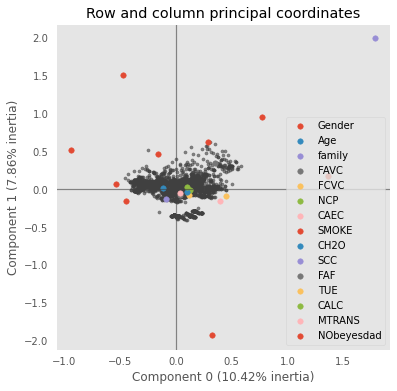

In [17]:
acm.plot_coordinates(DataO)

## Exploración Total

1. Crearemos Clusters usando también las variables cualitativas, el ejercicio consiste en poder medir distancias incluso entre variables/componentes cualitativas. Lo haremos con la distancia de Gower (qué es y como se calcula en Python), con esta distancia se monta una matriz de distancias entre los datos. 

**Solución:**

La distancia de Gower se puede utilizar para medir qué tan diferentes son dos registros. Los registros pueden contener una combinación de datos lógicos, categóricos, numéricos o de texto. La distancia es siempre un número entre 0 (idéntico) y 1 (máximamente diferente). 

Las métricas utilizadas para cada tipo de datos se describen a continuación:

- Cuantitativo (intervalo): distancia de Manhattan normalizada por rango.

- Ordinal: la variable se clasifica primero, luego la distancia de Manhattan se usa con un ajuste especial para los empates.

- Nominal: las variables de k categorías se convierten primero en k columnas binarias y luego se usa el coeficiente de Dice.


En esencia, la distancia de Gower es calculada como el promedio de disimilaridades parciales entre individuos. De manera general, este coeficiente se calcula como sigue:

$$D_{Gow}(x_1,x_2)=1-\frac{1}{p}\sum\limits_{j=1}^p s_j(x_1,x_2).$$

Aquí $s_j(x_1,x_2)$ se conoce como la similaridad parcial de $j$-ésimo descriptor.



Para descriptores cuantitativos tenemos:

$$s_j(x_1,x_2)=1-\cfrac{|y_{1j}-y_{2j}|}{R_j}$$

Para descriptores cualitativos se usa el coeficiente de Sorensen-Dice, se calcula de la siguiente forma:

$$s_j(x_1,x_2)=1-\frac{NNEQ}{NTT+NNZ}$$

donde (tomado de scikit-learn):

***

N : number of dimensions

NTT : number of dims in which both values are True

NTF : number of dims in which the first value is True, second is False

NFT : number of dims in which the first value is False, second is True

NFF : number of dims in which both values are False

NNEQ : number of non-equal dimensions, NNEQ = NTF + NFT

NNZ : number of nonzero dimensions, NNZ = NTF + NFT + NTT
***



|reg|Color|orientacion|
|:--:|:--:|:--:|
|1|Amarillo|izquierda|
|2|Amarillo|derecha|

|reg|Amarillo|Azul|Rojo|Derecha|izquierda|
|:--:|:--:|:--:|:--:|:--:|:-:|
|1|1|0|0|0|1|
|2|1|0|0|1|0|


Ahora calculemos la distancia de Gower:




In [18]:
DataO.columns

Index(['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'NObeyesdad'],
      dtype='object')

In [19]:
columns=['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']

In [20]:
DataO[columns]

Gender  Age  family_history_with_overweight  FAVC  FCVC  NCP  CAEC  \
0          0   21                               1     0     2    3     2   
1          0   21                               1     0     3    3     2   
2          1   23                               1     0     2    3     2   
3          1   27                               0     0     3    3     2   
4          1   22                               0     0     2    1     2   
...      ...  ...                             ...   ...   ...  ...   ...   
2106       0   21                               1     1     3    3     2   
2107       0   22                               1     1     3    3     2   
2108       0   23                               1     1     3    3     2   
2109       0   24                               1     1     3    3     2   
2110       0   24                               1     1     3    3     2   

      SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  
0         0     2    0    0    1     3       3  
1         1     3    1    3    0     2       3  
2         0     2    0    2    1     1       3  
3         0     2    0    2    0     1       4  
4         0     2    0    0    0     2       3  
...     ...   ...  ...  ...  ...   ...     ...  
2106      0     2    0    2    1     2       3  
2107      0     2    0    1    1     2       3  
2108      0     2    0    1    1     2       3  
2109      0     3    0    1    1     2       3  
2110      0     3    0    1    1     2       3  

[2111 rows x 14 columns]

In [21]:
import gower as gw
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
model = AgglomerativeClustering(n_clusters=6, affinity="precomputed", linkage="average")
distance_matrix=gw.gower_matrix(DataO)

model = model.fit(distance_matrix)

In [22]:
tsne = TSNE(n_components=2, perplexity=35, metric="precomputed")
df_tsne = tsne.fit_transform(distance_matrix)

In [23]:
fig=px.scatter(df_tsne, color=DataO.NObeyesdad)
fig.show()

2. Es importante generar visualizaciones adecuadas de los datos luego tendrán que poner cada registro en un plano cartesiano. Usar reducciones de dimensionalidad.

3. Concluyan a partir de los resultados.

## Aprendizaje Supervisado

En esta sección crearemos modelos que permitan

1. Particionan la base en 2 (Entrenamiento y testeo) (80/20) de nuevo con semilla fija.

2. Usando la base de entrenamiento crearán algunos modelos de clasificación con los siguientes métodos:

* Regresión Logística
* Clasificador Naive Bayes 
* Arboles de decisión
* Random Forest 
* SVD
3. Usando la base de testeo validar cada modelo (Uso matrices de confusión, estadísticos apropiados, curvas ROC, AUC...)
4. De acuerdo con los resultados identifico problemas como sobre ajuste y mal desempeño del modelo.
5. Si lo anterior resulta cierto aplico técnicas de regularización para estimar un modelo de clasificación adecuado.
6. Visualizamos el modelo (si es posible). 

## Regresion Logistica

In [24]:
lineal_m(DataO[columns],DataO.NObeyesdad)

                     precision    recall  f1-score   support

Insufficient_Weight       0.60      0.57      0.58        92
      Normal_Weight       0.27      0.27      0.27        77
     Obesity_Type_I       0.53      0.62      0.57       114
    Obesity_Type_II       0.58      0.86      0.69        85
   Obesity_Type_III       0.76      0.99      0.86        92
 Overweight_Level_I       0.56      0.30      0.39        89
Overweight_Level_II       0.41      0.21      0.28        85

           accuracy                           0.56       634
          macro avg       0.53      0.55      0.52       634
       weighted avg       0.54      0.56      0.53       634



## Clasificador Naive Bayes

                     precision    recall  f1-score   support

      Normal_Weight       0.47      0.61      0.53        49
 Overweight_Level_I       0.35      0.16      0.22        50
Overweight_Level_II       0.51      0.52      0.52        75
     Obesity_Type_I       0.38      0.96      0.54        53
Insufficient_Weight       0.97      1.00      0.99        73
    Obesity_Type_II       0.58      0.25      0.34        61
   Obesity_Type_III       0.57      0.21      0.31        62

           accuracy                           0.54       423
          macro avg       0.55      0.53      0.49       423
       weighted avg       0.57      0.54      0.51       423



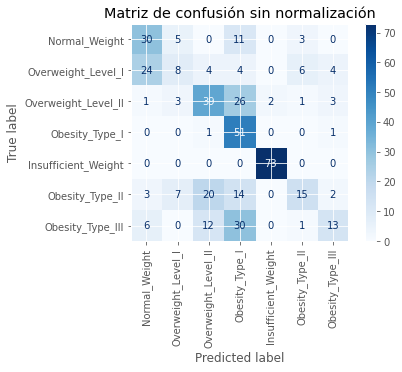

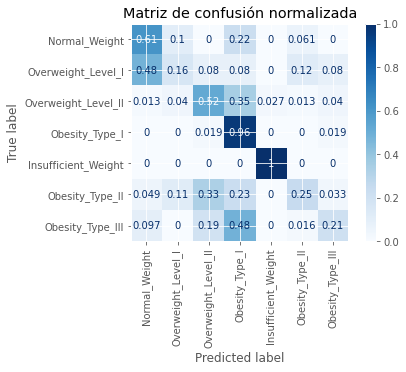

In [25]:
N_B(DataO[columns], DataO.NObeyesdad,list(DataO.NObeyesdad.unique()))

## Arboles de decision

In [26]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

In [27]:
graph=tree_desc(DataO[columns],DataO.NObeyesdad,columns,list(DataO.NObeyesdad.unique()))
graph.write_png('obesidad.png')
Image(graph.create_png())

Tamaño de X_train: (1477, 14)
Tamaño de y_train: (1477,)
Tamaño de X_test: (634, 14)
Tamaño de y_test: (634,)
                     precision    recall  f1-score   support

      Normal_Weight       0.86      0.84      0.85        92
 Overweight_Level_I       0.53      0.48      0.50        77
Overweight_Level_II       0.88      0.78      0.83       114
     Obesity_Type_I       0.84      0.92      0.88        85
Insufficient_Weight       0.98      0.99      0.98        92
    Obesity_Type_II       0.68      0.70      0.69        89
   Obesity_Type_III       0.62      0.71      0.66        85

           accuracy                           0.78       634
          macro avg       0.77      0.77      0.77       634
       weighted avg       0.78      0.78      0.78       634

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.848117 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.848117 to fit



## Random Forest

In [28]:
random_forest(DataO[columns],DataO.NObeyesdad)  

Accuracy: 0.811 (0.030)


## SVM

In [29]:
svm_f(DataO[columns],DataO.NObeyesdad, list(DataO.NObeyesdad.unique()))

Tamaño de X_train: (1477, 14)
Tamaño de y_train: (1477,)
Tamaño de X_test: (634, 14)
Tamaño de y_test: (634,)
                     precision    recall  f1-score   support

      Normal_Weight       0.60      0.70      0.65        86
 Overweight_Level_I       0.46      0.40      0.43        77
Overweight_Level_II       0.53      0.70      0.60       116
     Obesity_Type_I       0.61      0.85      0.71        86
Insufficient_Weight       0.97      0.99      0.98        93
    Obesity_Type_II       0.62      0.50      0.56        90
   Obesity_Type_III       0.63      0.20      0.30        86

           accuracy                           0.63       634
          macro avg       0.63      0.62      0.60       634
       weighted avg       0.63      0.63      0.61       634




## Infome Final

Elaboramos un informe como cuaderno de jupyter que responda la pregunta planteada en esta investigación ¿Como afectan la condición física y los hábitos alimenticios a la obesidad? 